### Data Analysis On tmdb-movies

This data analysis seeks to ask and answer the following questions below from a period between 2005 to 2015.

- The most popular genre
- The most popular movie 
- Director with the most popular movie 
- The most profitable movie
- Production company with the most Profit.

In [87]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

movies_df = pd.read_csv("tmdb-movies.csv")

In [88]:
#viewing the shape of the data
movies_df.shape

(10866, 21)

In [89]:
movies_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [90]:
#viewing the columns
movies_df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [91]:
#viewing the top 5 contents of the data
movies_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


#### Filtering the dataset for 2005 to 2015 

In [92]:
movies = movies_df[movies_df['release_year'] >= 2005]
movies 

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7820,21623,tt0467167,0.017396,0,0,Beneath,Nora Zehetner|Brenna O'Brien|Carly Pope|Don S....,NaN,Dagen Merrill,NaN,...,Christy (Zehetner) returns to her hometown yea...,82,Horror|Mystery|Thriller,MTV Films|Paramount Classics,7/8/07,14,5.0,2007,0.000000e+00,0.000000e+00
7821,39561,tt0865951,0.013017,1100000,0,Testosteron,Piotr Adamczyk|Magdalena Boczarska|Maria Gladk...,NaN,Tomasz Konecki|Andrzej Saramonowicz,NaN,...,"The wedding of Kornel, a young, well known TV ...",116,Comedy,Van Worden,3/2/07,10,6.0,2007,1.156835e+06,0.000000e+00
7822,36443,tt1039647,0.010471,200000,0,The Union: The Business Behind Getting High,George H. W. Bush|George W. Bush|Chris Bennett,http://www.theunionmovie.com/,Brett Harvey,NaN,...,Filmmaker Adam Scorgie explores the illegal ma...,104,Comedy|Documentary,NaN,5/8/07,14,6.8,2007,2.103337e+05,0.000000e+00
7823,19934,tt1024896,0.009512,0,0,Ce soir je dors chez toi,Jean-Paul Rouve|MÃ©lanie Doutey|Kad Merad|Rhil...,NaN,Olivier Baroux,NaN,...,Alex and Laetitia appear to make the perfect c...,84,Comedy,SPAD Films|KL Productions|Alter Films,11/21/07,12,5.3,2007,0.000000e+00,0.000000e+00


#### Cleaning the data

In [93]:
#checking for duplicates 
movies.duplicated().sum()

1

In [94]:
#dropping duplicates 
movies.drop_duplicates(inplace = True)
movies.duplicated().sum()

/data/user/0/ru.iiec.pydroid3/cache/ipykernel_4732/2930780236.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies.drop_duplicates(inplace = True)


0

In [95]:
#dropping unnecessary columns 
movies.drop(columns = ['imdb_id','keywords','tagline','homepage','overview'], inplace = True)

/data/user/0/ru.iiec.pydroid3/files/arm-linux-androideabi/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [96]:
#replacing 0 values to NaN values 
import numpy as np
movies = movies.replace(0, np.nan)

In [97]:
#Checking for Null values 
movies.isnull().sum()

id                         0
popularity                 0
budget                  3246
revenue                 3491
original_title             0
cast                      59
director                  39
runtime                   27
genres                    16
production_companies     686
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj              3246
revenue_adj             3491
dtype: int64

In [98]:
#dropping Null values 
movies.dropna(inplace = True)
movies.isnull().sum()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [99]:
movies.shape

(1851, 16)

### Q1 : The Most Popular Genre 

In [104]:
genre = movies[['popularity', 'genres']]
genre 

,popularity,genres
0,32.985763,Action|Adventure|Science Fiction|Thriller
1,28.419936,Action|Adventure|Science Fiction|Thriller
2,13.112507,Adventure|Science Fiction|Thriller
3,11.173104,Action|Adventure|Science Fiction|Fantasy
4,9.335014,Action|Crime|Thriller
...,...,...
7758,0.144186,Drama
7761,0.138009,Comedy|Drama|Romance
7776,0.422526,Comedy|Horror
7785,0.104735,Action|Adventure|Comedy|Crime


Removing '|' from genres column to split them into multiple rows.

In [105]:
#creating the fuction split() to remove '|'
def split(a,b):
    a.set_index(b, inplace = True)
    x = _.apply(lambda x: x.str.split('|').explode())
    return x

In [106]:
split(genre,'popularity')

,genres
popularity,
32.985763,Action
32.985763,Adventure
32.985763,Science Fiction
32.985763,Thriller
28.419936,Action
...,...
0.104735,Comedy
0.104735,Crime
0.080562,Action


In [107]:
#Reset index to default
_.reset_index()

,popularity,genres
0,32.985763,Action
1,32.985763,Adventure
2,32.985763,Science Fiction
3,32.985763,Thriller
4,28.419936,Action
...,...,...
4799,0.104735,Comedy
4800,0.104735,Crime
4801,0.080562,Action
4802,0.080562,Comedy


In [21]:
(_.groupby('genres')['popularity']).sum()


genres
Action             1017.435867
Adventure           857.405057
Animation           218.171523
Comedy              765.219938
Crime               385.917795
Documentary           5.702804
Drama              1025.586762
Family              358.716068
Fantasy             401.435720
Foreign               0.634284
History              67.395720
Horror              199.136978
Music                68.192033
Mystery             219.784435
Romance             340.287780
Science Fiction     602.849322
Thriller            894.878470
War                  77.209654
Western              34.648304
Name: popularity, dtype: float64

In [24]:
#sort values from the highest to the lowest
mp_genre = _.sort_values('popularity', ascending = False)
mp_genre


,genres,popularity
6,Drama,1025.586762
0,Action,1017.435867
16,Thriller,894.878470
1,Adventure,857.405057
3,Comedy,765.219938
15,Science Fiction,602.849322
8,Fantasy,401.435720
4,Crime,385.917795
7,Family,358.716068
14,Romance,340.287780


### Q2 : The Most Popular Movie

In [29]:
movie = movies[['original_title', 'popularity']]
movie

,original_title,popularity
0,Jurassic World,32.985763
1,Mad Max: Fury Road,28.419936
2,Insurgent,13.112507
3,Star Wars: The Force Awakens,11.173104
4,Furious 7,9.335014
...,...,...
7758,The Tracey Fragments,0.144186
7761,Daddy's Little Girls,0.138009
7776,My Name Is Bruce,0.422526
7785,Reno 911!: Miami,0.104735


In [30]:
mp_movie = movie.sort_values('popularity', ascending = False)
mp_movie

,original_title,popularity
0,Jurassic World,32.985763
1,Mad Max: Fury Road,28.419936
629,Interstellar,24.949134
630,Guardians of the Galaxy,14.311205
2,Insurgent,13.112507
...,...,...
6041,The Internship,0.040858
2398,Boy,0.028456
2378,Action Replayy,0.028227
3340,Expelled: No Intelligence Allowed,0.021371


### Q3 : Director with the most popular movie 

In [109]:
director = movies[['popularity','director']]

In [110]:
director.describe()

,popularity
count,1851.000000
mean,1.439148
std,1.832057
min,0.010335
25%,0.567304
50%,0.938555
75%,1.629247
max,32.985763


In [111]:
(director.groupby('director')['popularity']).sum()

director
 FrÃ©dÃ©ric Jardin                0.434506
Aaron Seltzer|Jason Friedberg     0.698297
Abbas Tyrewala                    0.193779
Abe Sylvia                        0.315527
Adam Green                        0.296660
                                   ...    
Xavier Gens                       1.105177
Yorgos Lanthimos                  2.885126
Zach Braff                        0.778247
Zack Snyder                      12.089035
Zal Batmanglij                    0.337710
Name: popularity, Length: 1093, dtype: float64

In [112]:
mp_director = director.sort_values('popularity', ascending = False)
mp_director 

,popularity,director
0,32.985763,Colin Trevorrow
1,28.419936,George Miller
629,24.949134,Christopher Nolan
630,14.311205,James Gunn
2,13.112507,Robert Schwentke
...,...,...
6041,0.040858,Shawn Levy
2398,0.028456,Taika Waititi
2378,0.028227,Vipul Amrutlal Shah
3340,0.021371,Nathan Frankowski


### Q4 : The Most Profitable Movie

In [34]:
#creating a new column 'profit' which is revenue - budget
movies['profit'] = movies['revenue'] - movies['budget']
movies.head(1)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.363529e+09


In [57]:
movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
count,1851.000000,1851.000000,1.851000e+03,1.851000e+03,1851.000000,1851.000000,1851.000000,1851.000000,1.851000e+03,1.851000e+03,1.851000e+03
mean,72379.279308,1.439148,4.474696e+07,1.268230e+08,108.235548,703.659103,6.128903,2010.038358,4.452192e+07,1.253237e+08,8.207600e+07
std,85257.236197,1.832057,5.062776e+07,2.104837e+08,18.046835,1041.058030,0.768292,3.117542,4.999171e+07,2.059059e+08,1.761332e+08
min,25.000000,0.010335,1.000000e+00,1.100000e+01,63.000000,10.000000,2.200000,2005.000000,9.693980e-01,1.029637e+01,-4.139124e+08
25%,10232.500000,0.567304,1.200000e+07,1.288210e+07,96.000000,118.000000,5.600000,2007.000000,1.161926e+07,1.292110e+07,-2.168756e+06
50%,38408.000000,0.938555,2.600000e+07,5.230400e+07,105.000000,310.000000,6.100000,2010.000000,2.667999e+07,5.195037e+07,2.163726e+07
75%,96978.000000,1.629247,5.840000e+07,1.447464e+08,117.000000,814.000000,6.600000,2013.000000,5.698466e+07,1.431167e+08,9.219408e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.200000,2015.000000,4.250000e+08,2.827124e+09,2.544506e+09


In [35]:
profit = movies[['original_title', 'profit']]
profit.head()

,original_title,profit
0,Jurassic World,1.363529e+09
1,Mad Max: Fury Road,2.284364e+08
2,Insurgent,1.852382e+08
3,Star Wars: The Force Awakens,1.868178e+09
4,Furious 7,1.316249e+09


In [36]:
#sorting the values from the highest to the Lowest
movie_profit = profit.sort_values('profit', ascending = False)
movie_profit

,original_title,profit
1386,Avatar,2.544506e+09
3,Star Wars: The Force Awakens,1.868178e+09
0,Jurassic World,1.363529e+09
4,Furious 7,1.316249e+09
4361,The Avengers,1.299558e+09
...,...,...
6590,Flushed Away,-8.454068e+07
6707,Charlotte's Web,-8.499986e+07
3484,Mars Needs Moms,-1.110072e+08
5508,The Lone Ranger,-1.657101e+08


#### Visualization 

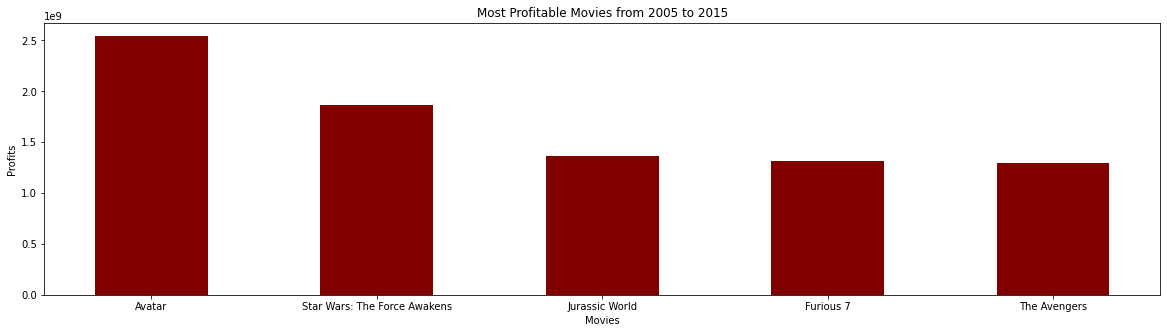

In [37]:
fig = plt.figure(figsize = (20, 5))

# creating the bar plot
plt.bar(movie_profit['original_title'][0:5], movie_profit['profit'][0:5], color ='maroon', width = 0.5)

plt.xlabel("Movies")
plt.ylabel("Profits")
plt.title("Most Profitable Movies from 2005 to 2015")
plt.show()

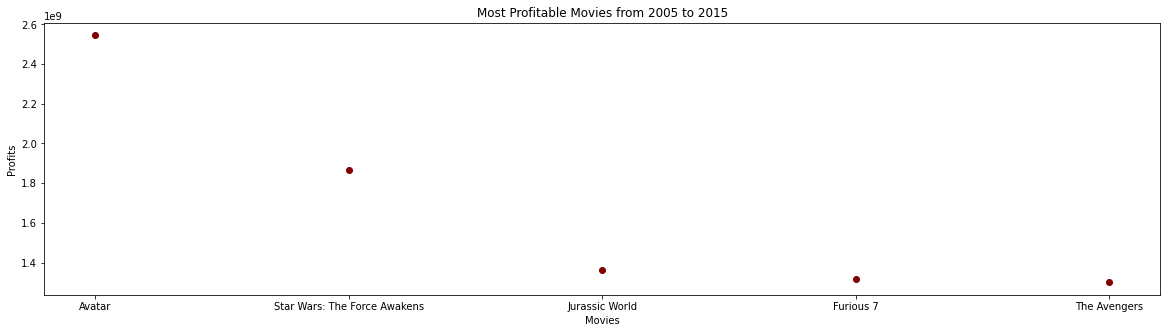

In [38]:
fig = plt.figure(figsize = (20, 5))

# creating the scatter plot
plt.scatter(movie_profit['original_title'][0:5], movie_profit['profit'][0:5], color ='maroon')

plt.xlabel("Movies")
plt.ylabel("Profits")
plt.title("Most Profitable Movies from 2005 to 2015")
plt.show()

### Q5 : Production Company With The Most Profit

In [46]:
company = movies[['production_companies', 'profit']]
company

,production_companies,profit
0,Universal Studios|Amblin Entertainment|Legenda...,1.363529e+09
1,Village Roadshow Pictures|Kennedy Miller Produ...,2.284364e+08
2,Summit Entertainment|Mandeville Films|Red Wago...,1.852382e+08
3,Lucasfilm|Truenorth Productions|Bad Robot,1.868178e+09
4,Universal Pictures|Original Film|Media Rights ...,1.316249e+09
...,...,...
7758,TÃ©lÃ©film Canada|Shadow Shows|Corvid Pictures,-6.684240e+05
7761,"Lions Gate Films|Tyler Perry Company, The",2.160924e+07
7776,Dark Horse Entertainment|Image Entertainment,-1.326934e+06
7785,20th Century Fox,1.034216e+07


Removing '|' from production_companies column to split them into multiple rows.

In [47]:
split(company,'profit')

,production_companies
profit,
1.363529e+09,Universal Studios
1.363529e+09,Amblin Entertainment
1.363529e+09,Legendary Pictures
1.363529e+09,Fuji Television Network
1.363529e+09,Dentsu
...,...
2.160924e+07,"Tyler Perry Company, The"
-1.326934e+06,Dark Horse Entertainment
-1.326934e+06,Image Entertainment


In [48]:
_.reset_index()


,profit,production_companies
0,1.363529e+09,Universal Studios
1,1.363529e+09,Amblin Entertainment
2,1.363529e+09,Legendary Pictures
3,1.363529e+09,Fuji Television Network
4,1.363529e+09,Dentsu
...,...,...
5966,2.160924e+07,"Tyler Perry Company, The"
5967,-1.326934e+06,Dark Horse Entertainment
5968,-1.326934e+06,Image Entertainment
5969,1.034216e+07,20th Century Fox


In [42]:
(_.groupby('production_companies')['profit']).sum()


production_companies
1019 Entertainment          8.015080e+05
10th Hole Productions       2.139614e+07
11:11 Mediaworks            9.418833e+07
120dB Films                -4.932152e+06
1492 Pictures               1.646657e+09
                                ...     
area japan                 -1.468300e+07
erbp                        3.440980e+05
iDeal Partners Film Fund   -3.944875e+06
platinum studios           -3.543613e+06
uFilm                       9.343926e+07
Name: profit, Length: 2078, dtype: float64

In [45]:
company_profit = _.sort_values('profit', ascending = False)
company_profit 

,production_companies,profit
1994,Warner Bros.,1.790410e+10
1928,Universal Pictures,1.566617e+10
1990,Walt Disney Pictures,1.374658e+10
404,Columbia Pictures,1.349551e+10
1902,Twentieth Century Fox Film Corporation,1.263402e+10
...,...,...
190,Baldwin Entertainment Group,-8.776642e+07
701,France 2 CinÃ©ma,-1.105364e+08
247,Blind Wink Productions,-1.657101e+08
1663,Silver Bullet Productions (II),-1.657101e+08


#### Visualization 

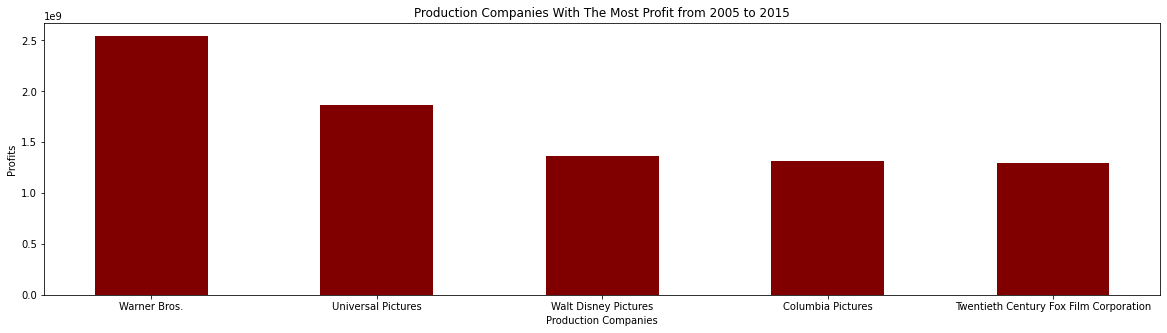

In [49]:
fig = plt.figure(figsize = (20, 5))

# creating the bar plot
plt.bar(company_profit['production_companies'][0:5], movie_profit['profit'][0:5], color ='maroon', width = 0.5)

plt.xlabel("Production Companies")
plt.ylabel("Profits")
plt.title("Production Companies With The Most Profit from 2005 to 2015")
plt.show()

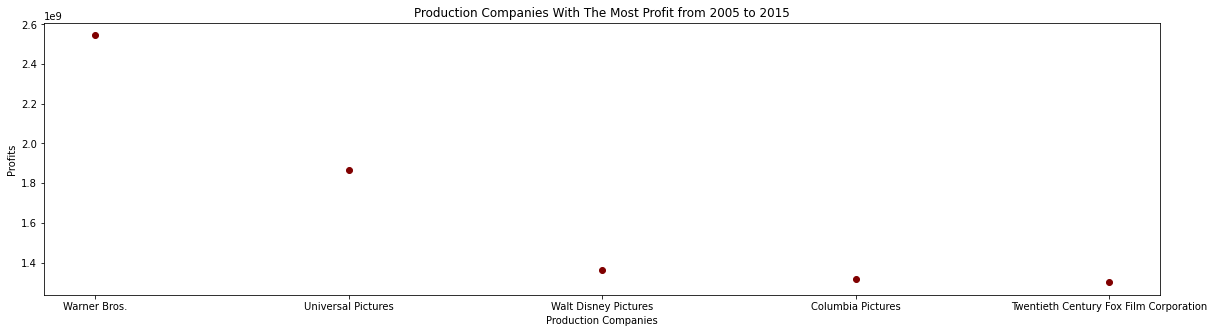

In [50]:
fig = plt.figure(figsize = (20, 5))

# creating the scatter plot
plt.scatter(company_profit['production_companies'][0:5], movie_profit['profit'][0:5], color ='maroon')

plt.xlabel("Production Companies")
plt.ylabel("Profits")
plt.title("Production Companies With The Most Profit from 2005 to 2015")
plt.show()

### Conclusions

- Question 1 : The most popular genre?
- Question 2 : The most popular movie?
- Question 3 : The Director with the most popular movie?
- Question 4 : The most profitable movie?
- Question 5 : Production company with the most profit?

#### Question 1 : The most popular genre 

From the analysis, DRAMA is the most popular movie genre during the 10 year release period from 2005 to 2015 under review. 

In [51]:
mp_genre.head(1)

,genres,popularity
6,Drama,1025.586762


#### Question 2 : The most popular movie 

From the analysis, JURASSIC WORLD is the most popular movie during the 10 year release period from 2005 to 2015 under review. 

In [52]:
mp_movie.head(1)

,original_title,popularity
0,Jurassic World,32.985763


#### Question 3 : Director with the most popular movie 

From the analysis, director COLIN TREVORROW directed the most popular movie (JURASSIC WORLD) of the second most popular genre (ACTION) summed up together during the 10 year span from 2005 to 2015.

In [53]:
mp_director.head(1)

,popularity,director
0,32.985763,Colin Trevorrow


#### Question 4 : The most profitable movie 

From the analysis and visualization that shows the top 5 most profitable movie, the movie AVATAR made the most profit during the 10 year period from 2005 to 2015 under review.

In [54]:
movie_profit.head(1)

,original_title,profit
1386,Avatar,2.544506e+09


#### Question 5 : Production company with the most profit 

From the analysis and visualization show the top 5 production companies with most profit, WARNER BROS production company made the most profit during the 10 year period from 2005 to 2015 under review.

In [55]:
company_profit.head(1)

,production_companies,profit
1994,Warner Bros.,1.790410e+10


### Limitations 
- The dataset and analysis doesn't give enough reasons why some movies and genres are more popular or earned more profit than others, such questions could have been answered if a columns like 'audience/critics ratings' were present.